**Mileage Prediction - Regression Analysis**

**Data Source:**

The data used in this project is sourced from the StatLib library, which is maintained by Carnegie Mellon University. The dataset was originally used in the 1983 American Statistical Association Exposition.

**Data Set Information:**

The dataset used in this project is a modified version of the dataset available in the StatLib library. The modifications were made to align the dataset with Ross Quinlan's work in 1993, specifically in predicting the attribute 'mpg'. Eight instances were removed from the original dataset as they had unknown values for the 'mpg' attribute. The original dataset is available under the name 'auto-mpg.data-original'.

**Import Library**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

**Import Data**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

**Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
df.corr()

<ipython-input-14-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


**Data Visualization**

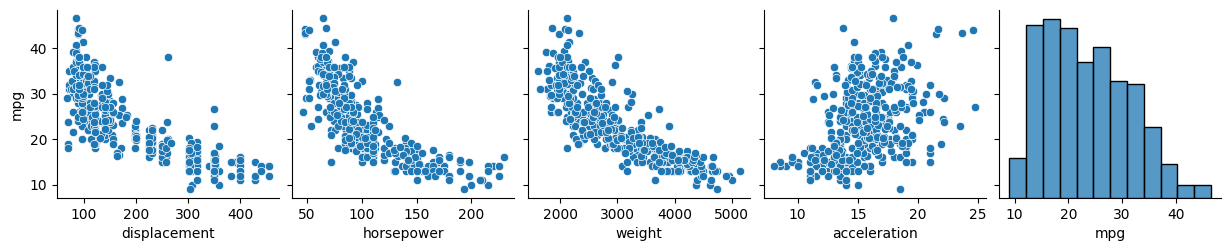

In [ ]:
sns.pairplot(df, x_vars = ['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars = 'mpg')

<Axes: xlabel='displacement', ylabel='mpg'>

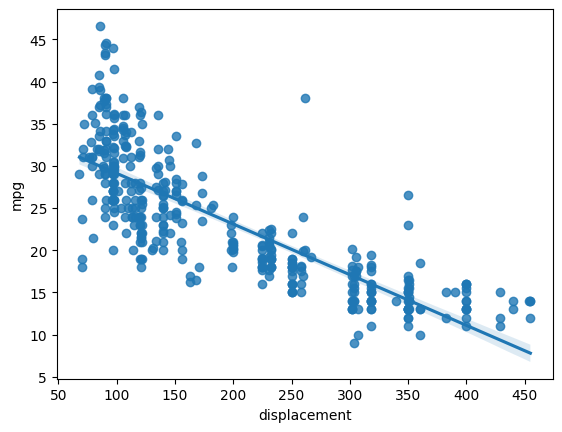

In [ ]:
sns.regplot(x = 'displacement', y = 'mpg', data = df)

**Define Target Variable y and Feature X**

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y = df['mpg']

In [ ]:
y.shape

(392,)

In [ ]:
x = df[['displacement', 'horsepower', 'weight', 'acceleration']]

In [ ]:
x.shape

(392, 4)

**Scaling Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
x = ss.fit_transform(x)

In [ ]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


**Train Test Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7)

In [ ]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((274, 4), (118, 4), (274,), (118,))

**Linear Regression Mode**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
lr.intercept_

23.194970952541173

In [ ]:
lr.coef_

array([-1.21538806, -1.78218543, -3.78045941, -0.40903979])

**Predict Test Data**

In [ ]:
y_pred = lr.predict(xtest)

In [ ]:
y_pred

array([25.29036873, 31.51687094, 27.07691682, 20.9419264 , 24.24271096,
       27.91977701, 28.10037506, 12.52577321, 29.80170803, 24.05027277,
       15.0213462 , 22.17190987, 22.9282886 , 25.81053837, 15.0400518 ,
       30.1288201 , 18.30591938, 29.22040186,  8.42339276, 29.03525246,
       30.62361817, 26.59006787, 30.3355752 ,  8.05710719, 16.90299434,
       21.24335403, 25.7601556 , 31.4728297 , 25.90161503, 25.08668728,
       22.57676748,  9.76284998, 28.56442265, 23.75904661, 28.62194313,
       30.73700076, 16.09893124, 27.08000106, 29.65678811, 20.78406632,
       30.34012061, 12.14508876, 29.15661907, 10.4110221 , 17.79363711,
       12.97755611, 14.96210423, 16.18619804, 24.58491981, 27.41843735,
       14.11264372, 30.97225891, 29.0348709 , 26.63419792, 23.67400616,
       24.74984708, 28.81485387, 24.72050368, 24.69904675, 18.91773603,
       31.11800596, 30.19227349,  9.28795348, 13.32771912, 24.60498236,
        9.6572956 , 24.23247529, 29.57421744, 21.59919805, 23.23

**Model Accuracy**

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

In [ ]:
mean_absolute_error(ytest, y_pred)

3.3965377792476437

In [ ]:
mean_absolute_percentage_error(ytest, y_pred)

0.1362284516907619

In [ ]:
r2_score(ytest, y_pred)

0.6998117458764972

**Explation:**

The goal of this project is to create a machine learning model that can predict the mileage of a car in city driving, based on data about various parameters for almost 400 cars. The dataset used for this project is from UCI and contains accurate values for features such as engine displacement, horsepower, weight, and others. However, it's important to note that there are other factors beyond these features that can also affect a car's mileage, such as wind direction and strength, road conditions, traffic, weather, and driver experience. Despite these limitations, the project aims to train a model to learn the relationship between the dependent variable (mileage) and independent variables (features) through regression analysis.
